<a href="https://colab.research.google.com/github/ferramdr/ANIEI-Data-Analysis-SPARK-SQL-/blob/main/An%C3%A1lisis_de_Datos_Masivos_con_Spark_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! ls -la /content/drive/MyDrive/Taller\ ANIEI

total 587
-rw------- 1 root root 600357 Oct 15 21:31 sales_cubo.csv


In [ ]:
! head /content/MyDrive/datos/sales_cubo.csv

head: cannot open '/content/MyDrive/datos/sales_cubo.csv' for reading: No such file or directory


In [ ]:
! pip install -q pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from tabulate import tabulate

In [ ]:
from pyspark.sql.types import *

schema = StructType([
    StructField("sales_id", IntegerType(), True),
    StructField("profit", DoubleType(), True),
    StructField("units_sold", IntegerType(), True),
    StructField("price_per_unit", DoubleType(), True),
    StructField("discount", DoubleType(), True),
    StructField("total_cost", DoubleType(), True),
    StructField("profit_margin", DoubleType(), True),
    StructField("date", DateType(), True),
    StructField("year", IntegerType(), True),
    StructField("month", IntegerType(), True),
    StructField("month_name", StringType(), True),
    StructField("day", IntegerType(), True),
    StructField("day_name", StringType(), True),
    StructField("is_weekend", StringType(), True),
    StructField("quarter", IntegerType(), True),
    StructField("week", IntegerType(), True),
    StructField("continent", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("country_code", StringType(), True),
    StructField("region", StringType(), True),
    StructField("product", StringType(), True),
    StructField("category", StringType(), True),
    StructField("customer", StringType(), True),
    StructField("gender", StringType(), True),
    StructField("age", IntegerType(), True),
    StructField("occupation", StringType(), True),
    StructField("address", StringType(), True),
    StructField("phone", StringType(), True),
    StructField("email", StringType(), True)
])

In [ ]:
#Crear un spark session
spark = SparkSession.builder\
.master("local")\
.appName("SalesCubo").getOrCreate()

In [ ]:
df = spark.read\
.option("header", "true")\
.option("delimiter", ";")\
.option("mode", "DROPMALFORMED")\
.option("inferSchema", "false")\
.csv("/content/drive/MyDrive/Taller ANIEI/sales_cubo.csv", schema=schema)

In [ ]:
df.count()

NameError: name 'df' is not defined

In [ ]:
# Create a temporary view from the DataFrame to query it with SQL
df.createOrReplaceTempView("sales_data")

query = '''
SELECT
    year,
    ROUND(SUM(profit), 2) AS total_profit,
    ROUND(SUM(units_sold), 2) AS total_units_sold,
    ROUND(SUM(total_cost), 2) AS total_cost,
    ROUND(SUM(discount), 2) AS total_discount
FROM sales_data
GROUP BY year WITH ROLLUP
ORDER BY year IS NULL, year
'''
spark.sql(query).show(50, truncate=False)

+----+------------+----------------+----------+--------------+
|year|total_profit|total_units_sold|total_cost|total_discount|
+----+------------+----------------+----------+--------------+
|2015|27829.23    |10170           |311303.16 |5151.96       |
|2016|22009.05    |9654            |299509.81 |5730.06       |
|2017|19545.42    |9787            |282981.44 |5503.9        |
|2018|24816.65    |10713           |349699.23 |5629.13       |
|2019|26154.52    |10302           |292630.34 |5091.79       |
|2020|20119.47    |10774           |360523.04 |5421.71       |
|2021|36668.78    |11234           |344702.36 |5721.12       |
|2022|3224.63     |11744           |328737.14 |5970.91       |
|2023|43709.87    |11752           |358497.29 |6241.14       |
|NULL|224077.61   |96130           |2928583.81|50461.72      |
+----+------------+----------------+----------+--------------+



In [ ]:
# Mostrar las primeras líneas del archivo CSV directamente
!head "/content/drive/MyDrive/Taller ANIEI/sales_cubo.csv"

sales_id;profit;units_sold;price_per_unit;discount;total_cost;profit_margin;date;year;month;month_name;day;day_name;is_weekend;quarter;week;continent;country_name;country_code;region;product;category;customer;gender;age;occupation;address;phone;email
1;4.56;8;207.55;37.2;1957.4;-297;2023-03-06;2023;3;March;6;Monday;False;1;10;Europe;Italy;IT;Sicily;"SANFORD Liquid Accent Tank-Style Highlighters";"Office Supplies";"Kim Mathis";Non-Binary;37;"Medical sales representative";"20969 Ian Island Apt. 917 West Julie, MI 42380";(675)289-5392;janet69@rogers.com
2;4390.3665;100;463.81;49.28;2395.09;43985.91;2018-04-24;2018;4;April;24;Tuesday;False;2;16;"South America";Brazil;BR;"Rio de Janeiro";"Executive Impressions 12 Wall Clock";Furniture;"Brian Decker";Female;27;"Camera operator";"5466 Shelton Center Cameronville, TX 51168";978-207-1518x20377;jford@huang.com
3;-53.8096;83;344.5;32.12;484.03;28109.47;2018-02-18;2018;2;February;18;Sunday;True;1;7;Europe;"United Kingdom";UK;Scotland;"DAX Solid Wo

In [ ]:
query = '''
SELECT
    year, continent,
    ROUND(SUM(profit), 2) AS total_profit,
    ROUND(SUM(units_sold), 2) AS total_units_sold,
    ROUND(SUM(total_cost), 2) AS total_cost,
    ROUND(SUM(discount), 2) AS total_discount
FROM sales_data
GROUP BY year, continent WITH ROLLUP
ORDER BY year IS NULL, year
'''

spark.sql(query).show(50, truncate=False)

+----+-------------+------------+----------------+----------+--------------+
|year|continent    |total_profit|total_units_sold|total_cost|total_discount|
+----+-------------+------------+----------------+----------+--------------+
|2015|Oceania      |11290.08    |1778            |54995.59  |816.3         |
|2015|Asia         |5687.45     |1669            |62836.89  |858.75        |
|2015|Africa       |3464.86     |1141            |35336.95  |625.78        |
|2015|North America|1187.24     |1660            |46375.19  |813.12        |
|2015|NULL         |27829.23    |10170           |311303.16 |5151.96       |
|2015|South America|473.91      |2205            |70980.19  |1211.33       |
|2015|Europe       |5725.68     |1717            |40778.35  |826.68        |
|2016|Oceania      |14747.57    |1864            |69349.61  |1166.09       |
|2016|Africa       |-6135.88    |1764            |48307.36  |766.07        |
|2016|Europe       |5246.11     |1451            |54026.87  |1043.35       |

In [ ]:
query = '''
SELECT
    continent, country_name,
    ROUND(SUM(profit), 2) AS total_profit,
    ROUND(SUM(units_sold), 2) AS total_units_sold,
    ROUND(SUM(total_cost), 2) AS total_cost,
    ROUND(SUM(discount), 2) AS total_discount
FROM sales_data
GROUP BY continent, country_name WITH ROLLUP
ORDER BY continent IS NULL, continent
'''

spark.sql(query).show(50, truncate=False)

+-------------+----------------+------------+----------------+----------+--------------+
|continent    |country_name    |total_profit|total_units_sold|total_cost|total_discount|
+-------------+----------------+------------+----------------+----------+--------------+
|Africa       |South Africa    |-3068.35    |3067            |97000.27  |1374.23       |
|Africa       |Kenya           |-3506.47    |3580            |107456.17 |1752.19       |
|Africa       |Nigeria         |17086.4     |2778            |86359.12  |1403.01       |
|Africa       |NULL            |26534.43    |14938           |458669.74 |7383.91       |
|Africa       |Egypt           |9258.99     |2996            |80235.57  |1330.4        |
|Africa       |Morocco         |6763.86     |2517            |87618.61  |1524.08       |
|Asia         |South Korea     |4701.32     |3119            |84624.21  |1760.26       |
|Asia         |India           |2717.68     |2620            |88066.69  |1441.83       |
|Asia         |Japan 

In [ ]:
query = '''
SELECT
    year, continent, country_name,
    ROUND(SUM(profit), 2) AS total_profit,
    ROUND(SUM(units_sold), 2) AS total_units_sold,
    ROUND(SUM(total_cost), 2) AS total_cost,
    ROUND(SUM(discount), 2) AS total_discount
FROM sales_data
GROUP BY year, continent, country_name WITH ROLLUP
ORDER BY year IS NULL, year
'''

spark.sql(query).show(200, truncate=False)

+----+-------------+----------------+------------+----------------+----------+--------------+
|year|continent    |country_name    |total_profit|total_units_sold|total_cost|total_discount|
+----+-------------+----------------+------------+----------------+----------+--------------+
|2015|South America|NULL            |473.91      |2205            |70980.19  |1211.33       |
|2015|Asia         |South Korea     |-309.1      |193             |10505.37  |141.07        |
|2015|Asia         |Japan           |-113.96     |373             |9474.21   |123.79        |
|2015|Oceania      |Solomon Islands |992.86      |341             |11603.63  |208.54        |
|2015|South America|Venezuela       |-47.25      |280             |10411.42  |156.8         |
|2015|Asia         |Indonesia       |156.55      |219             |9178.33   |143.72        |
|2015|North America|Mexico          |-1593.34    |215             |9605.9    |128.85        |
|2015|North America|United States   |156.78      |353       

In [ ]:
query = '''
SELECT
    year, continent,
    ROUND(SUM(profit), 2) AS total_profit,
    ROUND(SUM(units_sold), 2) AS total_units_sold,
    ROUND(SUM(total_cost), 2) AS total_cost,
    ROUND(SUM(discount), 2) AS total_discount
FROM sales_data
GROUP BY year, continent WITH ROLLUP
ORDER BY year IS NULL, year
'''

spark.sql(query).show(50, truncate=False)

+----+-------------+------------+----------------+----------+--------------+
|year|continent    |total_profit|total_units_sold|total_cost|total_discount|
+----+-------------+------------+----------------+----------+--------------+
|2015|Oceania      |11290.08    |1778            |54995.59  |816.3         |
|2015|Asia         |5687.45     |1669            |62836.89  |858.75        |
|2015|Africa       |3464.86     |1141            |35336.95  |625.78        |
|2015|North America|1187.24     |1660            |46375.19  |813.12        |
|2015|NULL         |27829.23    |10170           |311303.16 |5151.96       |
|2015|South America|473.91      |2205            |70980.19  |1211.33       |
|2015|Europe       |5725.68     |1717            |40778.35  |826.68        |
|2016|Oceania      |14747.57    |1864            |69349.61  |1166.09       |
|2016|Africa       |-6135.88    |1764            |48307.36  |766.07        |
|2016|Europe       |5246.11     |1451            |54026.87  |1043.35       |

In [ ]:
#dice
query = '''
SELECT country_name, gender, ROUND(AVG(age), 2) avg_age
FROM sales_data
WHERE LOWER(continent) LIKE '%america'
GROUP BY country_name, gender
ORDER BY country_name, gender
'''

dfp = spark.sql(query).toPandas()

,country_name,gender,avg_age
0,Argentina,Female,48.31
1,Argentina,Male,54.25
2,Argentina,Non-Binary,56.42
3,Brazil,Female,45.44
4,Brazil,Male,54.00
5,Brazil,Non-Binary,53.52
6,Canada,Female,49.70
7,Canada,Male,57.00
8,Canada,Non-Binary,42.56
9,Colombia,Female,49.00


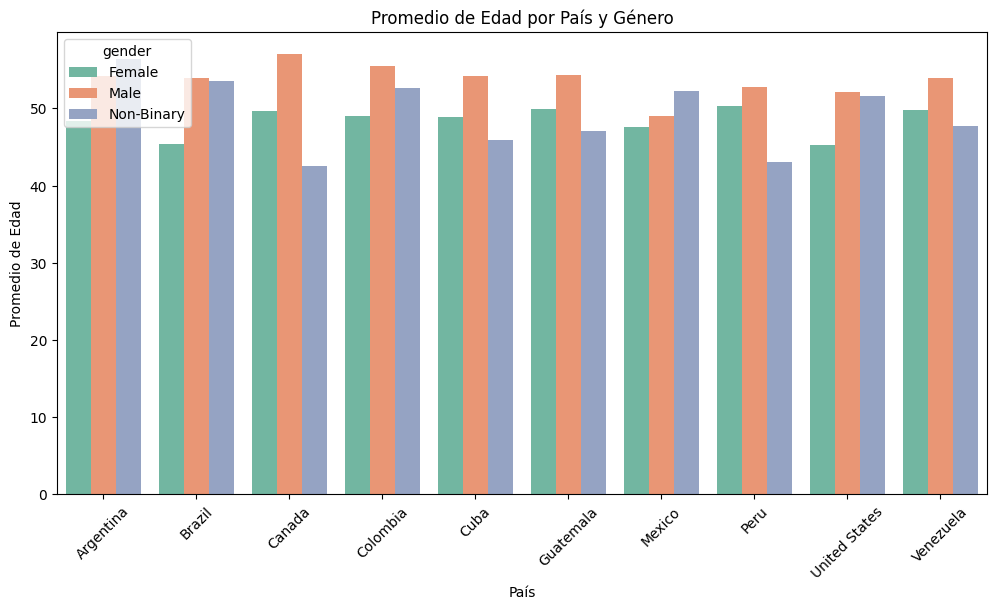

In [ ]:
#Graficar promedio de edad por país
plt.figure(figsize=(12, 6))
sns.barplot(x='country_name', y='avg_age', hue='gender', data=dfp, palette = "Set2")
plt.title('Promedio de Edad por País y Género')
plt.xlabel('País')
plt.ylabel('Promedio de Edad')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#dice
query = '''
SELECT country_name, gender, ROUND(AVG(age), 2) avg_age
FROM sales_data
WHERE LOWER(continent) LIKE '%america'
AND is_weekend = True
GROUP BY country_name, gender
ORDER BY country_name, gender
'''

dfp = spark.sql(query).toPandas()
dfp

,country_name,gender,avg_age
0,Argentina,Female,41.57
1,Argentina,Male,56.11
2,Argentina,Non-Binary,62.83
3,Brazil,Female,53.83
4,Brazil,Male,58.00
5,Brazil,Non-Binary,54.46
6,Canada,Female,42.50
7,Canada,Male,72.25
8,Canada,Non-Binary,43.60
9,Colombia,Female,55.10


In [ ]:
#Ventas por año y continente
query = '''
SELECT year,
CASE
  WHEN continent IS null AND year is not null THEN ''
  WHEN continent IS null AND year is not null THEN ''
  ELSE continent
END AS continent,
ROUND(SUM(profit), 2) AS total_profit
FROM sales_data
GROUP BY year, continent WITH ROLLUP
ORDER BY year IS NULL, year
'''

dfp = spark.sql(query).toPandas()
dfp

,year,continent,total_profit
0,2015.0,Oceania,11290.08
1,2015.0,Asia,5687.45
2,2015.0,Africa,3464.86
3,2015.0,North America,1187.24
4,2015.0,,27829.23
...,...,...,...
59,2023.0,North America,4610.43
60,2023.0,Asia,13737.11
61,2023.0,Africa,-123.62
62,2023.0,South America,8189.61


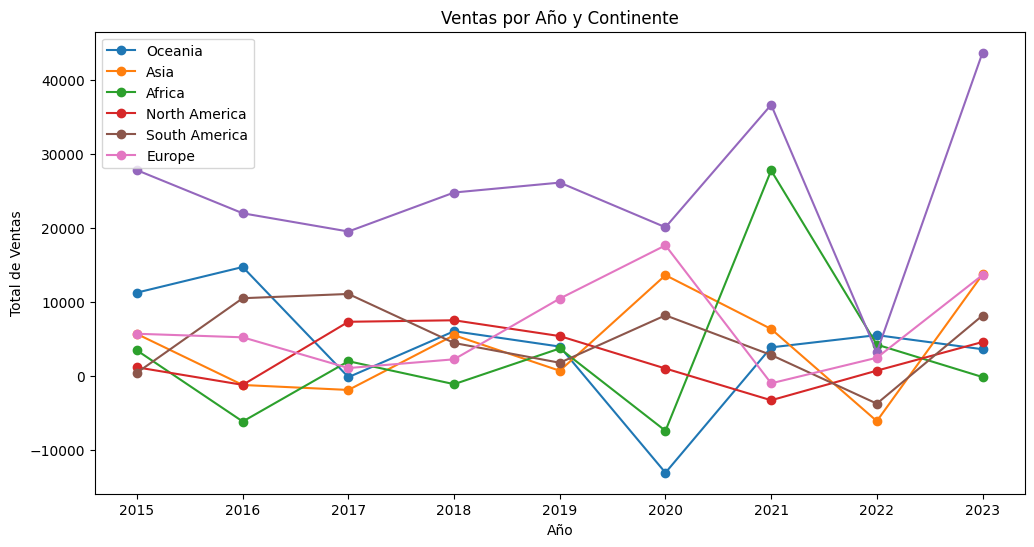

In [ ]:
#Graficar ventas por año y continente
plt.figure(figsize=(12, 6))
for cont in dfp['continent'].unique():
  subset = dfp[dfp['continent'] == cont]
  plt.plot(subset['year'], subset['total_profit'], marker='o', label=cont)

plt.title('Ventas por Año y Continente')
plt.xlabel('Año')
plt.ylabel('Total de Ventas')
plt.legend()
plt.show()


In [ ]:
#Funciones de ventana
#MARK
#Top 3 de productos más vendidos por país
query = '''
WITH ranked_products AS(
  SELECT country_name, product, SUM(units_sold) AS total_units_sold,
  RANK() OVER (PARTITION BY country_name ORDER BY SUM(units_sold) DESC) AS rank
  FROM sales_data
  GROUP BY country_name, product
)
SELECT * FROM ranked_products
WHERE rank <= 3
ORDER BY country_name, rank
'''

dfp = spark.sql(query).toPandas()
dfp

,country_name,product,total_units_sold,rank
0,Argentina,Xerox 1904,559,1
1,Argentina,Avery 501,289,2
2,Argentina,Binding Machine Supplies,231,3
3,Australia,Xerox 1904,399,1
4,Australia,Tenex B1-RE Series Chair Mats for Low Pile Car...,209,2
...,...,...,...,...
86,United States,Binding Machine Supplies,191,2
87,United States,Eldon Image Series Black Desk Accessories,141,3
88,Venezuela,Newell 321,420,1
89,Venezuela,Xerox 1904,370,2


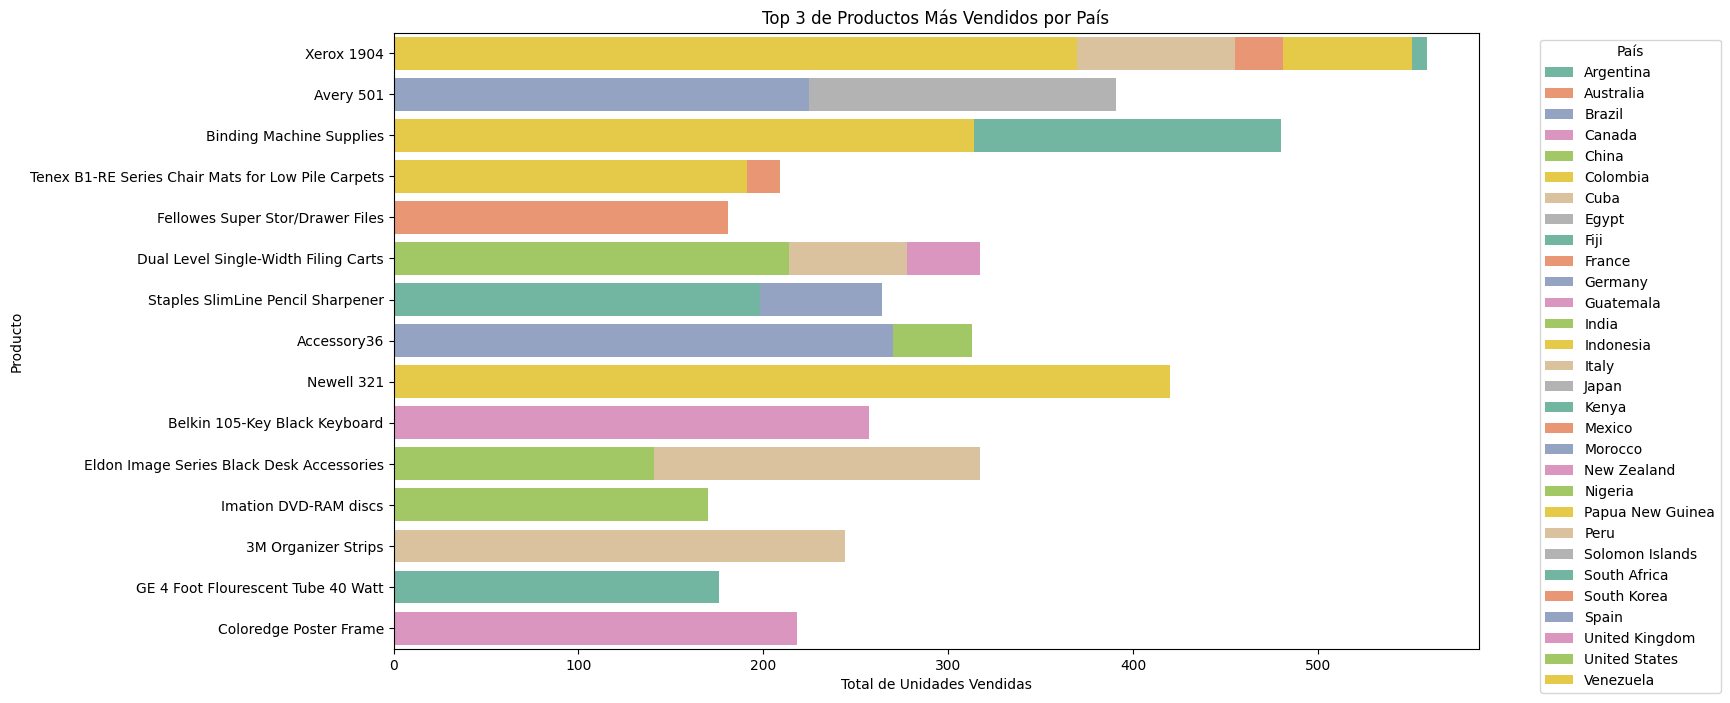

In [ ]:
#Graficar el top 3 de productos más vendidos
plt.figure(figsize=(14, 8))
sns.barplot(
    data=dfp,
    x='total_units_sold',
    y='product',
    hue = 'country_name', #Funciona como un group by
    palette = 'Set2',
    dodge = False
)

plt.title('Top 3 de Productos Más Vendidos por País')
plt.xlabel('Total de Unidades Vendidas')
plt.ylabel('Producto')
plt.legend(loc = 'upper left', title='País', bbox_to_anchor=(1.05, 1))
plt.show()

In [ ]:
#Funciones de ventana
#MARK
#Top 3 de productos más vendidos por grano

grano = 'category' #Nos permite mover nuestra grafica a distintos elementos
query = f'''
WITH ranked_products AS(
  SELECT {grano}, product, SUM(units_sold) AS total_units_sold,
  RANK() OVER (PARTITION BY {grano} ORDER BY SUM(units_sold) DESC) AS rank
  FROM sales_data
  GROUP BY {grano}, product
)
SELECT * FROM ranked_products
WHERE rank <= 3
ORDER BY {grano}, rank
'''

dfp = spark.sql(query).toPandas()
dfp

,category,product,total_units_sold,rank
0,Furniture,Eldon Image Series Black Desk Accessories,2074,1
1,Furniture,Executive Impressions 12 Wall Clock,1718,2
2,Furniture,Hon Valutask Swivel Chairs,1623,3
3,Office Supplies,Xerox 1904,8622,1
4,Office Supplies,Binding Machine Supplies,6617,2
5,Office Supplies,Avery 501,5273,3
6,Technology,Accessory36,2902,1
7,Technology,Imation DVD-RAM discs,1465,2
8,Technology,Canon P1-DHIII Palm Printing Calculator,1120,3


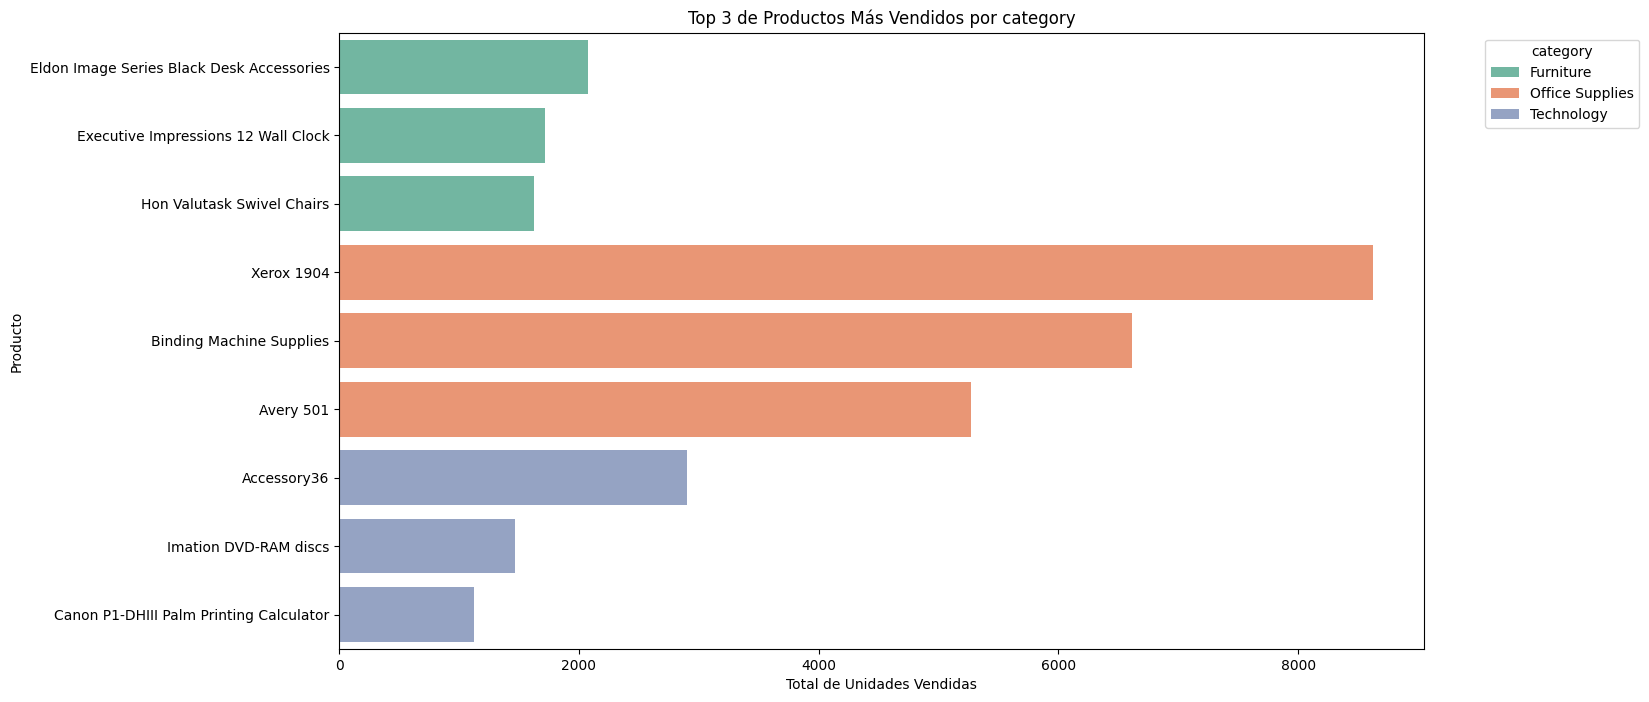

In [ ]:
#Graficar el top 3 de productos más vendidos
plt.figure(figsize=(14, 8))
sns.barplot(
    data=dfp,
    x='total_units_sold',
    y='product',
    hue = grano, #Funciona como un group by
    palette = 'Set2',
    dodge = False
)

plt.title(f'Top 3 de Productos Más Vendidos por {grano}')
plt.xlabel('Total de Unidades Vendidas')
plt.ylabel('Producto')
plt.legend(loc = 'upper left', title=grano, bbox_to_anchor=(1.05, 1))
plt.show()

Text(0, 0.5, 'Categoría')

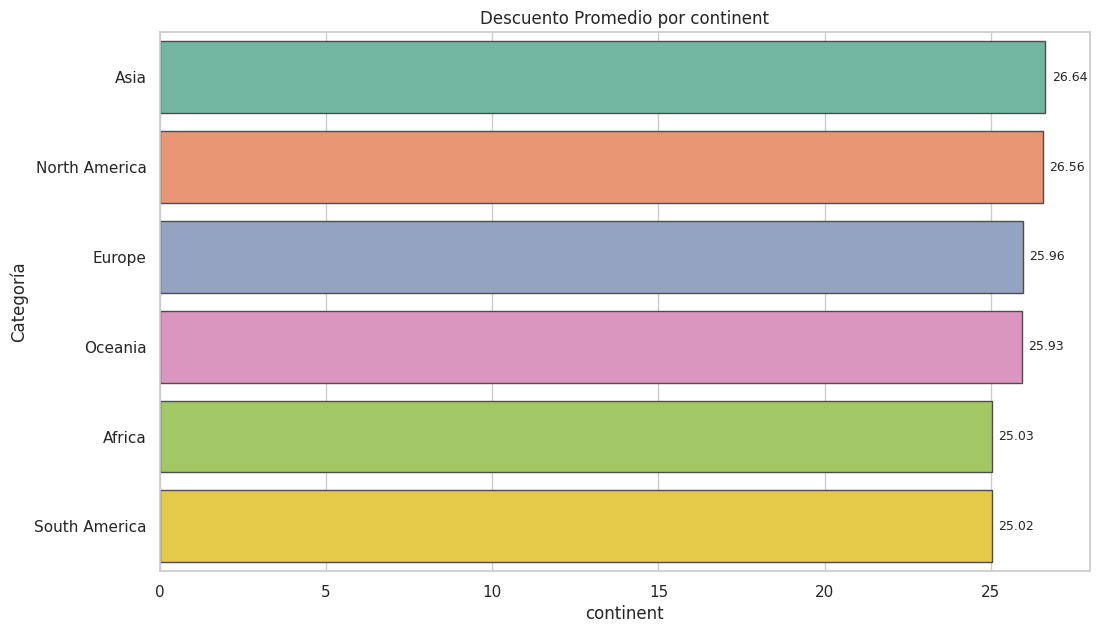

In [ ]:
#Descuento promedio por categoria

grano = 'continent'
query = f'''
SELECT {grano}, ROUND(AVG(discount), 2) AS avg_discount
FROM sales_data
GROUP BY {grano}
ORDER BY avg_discount DESC
'''

dfp = spark.sql(query).toPandas()

#Graficar
plt.figure(figsize=(12, 7))
sns.set(style='whitegrid')
sns.barplot(y=grano, x='avg_discount', data=dfp, hue=grano, legend=False, edgecolor='.3', palette='Set2')

for index, value in enumerate(dfp['avg_discount']):
  plt.text(value + 0.2, index, f'{value:.2f}', va='center', fontsize=9)

plt.title(f'Descuento Promedio por {grano}')
plt.xlabel(grano)
plt.ylabel('Categoría')

Text(0, 0.5, 'Total de Ventas')

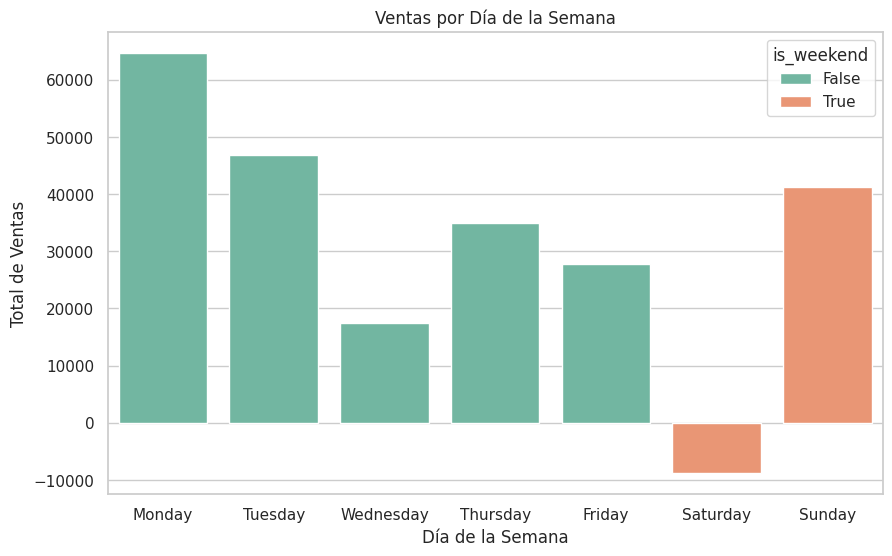

In [ ]:
#Ventas por día de la semana

query = f'''
SELECT day_name, is_weekend, COUNT(*) as nreg, SUM(profit) as total_profit
FROM sales_data
GROUP BY day_name, is_weekend
ORDER BY
  CASE day_name
    WHEN 'Monday' THEN 1
    WHEN 'Tuesday' THEN 2
    WHEN 'Wednesday' THEN 3
    WHEN 'Thursday' THEN 4
    WHEN 'Friday' THEN 5
    WHEN 'Saturday' THEN 6
    WHEN 'Sunday' THEN 7
    ELSE 8
  END
'''
dfp = spark.sql(query).toPandas()

#Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x='day_name', y='total_profit', hue='is_weekend', data=dfp, palette='Set2')
plt.title('Ventas por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Total de Ventas')

In [ ]:
#Ranking de paises por ganancia total
query = f'''
SELECT country_name, ROUND(SUM(profit), 2) AS total_profit,
RANK() OVER (ORDER BY SUM(profit) DESC) AS rank
FROM sales_data
GROUP BY country_name
ORDER BY rank
'''
dfp = spark.sql(query).toPandas()
dfp

,country_name,total_profit,rank
0,New Zealand,24759.03,1
1,Mexico,19146.36,2
2,Fiji,18985.23,3
3,Nigeria,17086.40,4
4,France,15641.04,5
5,Japan,15364.64,6
6,Venezuela,13379.51,7
7,Brazil,13321.02,8
8,United Kingdom,12312.86,9
9,Germany,11917.71,10


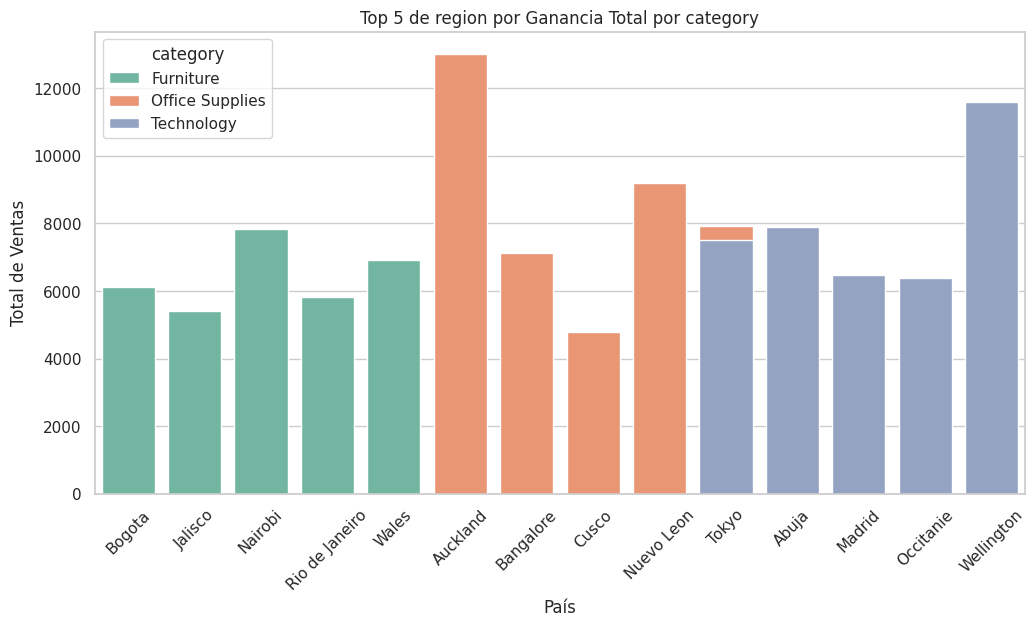

In [ ]:
#Ranking de paises por ganancia total por continente

grano = 'region'
particion = 'category'
top = '5'
query = f'''
SELECT * FROM (
  SELECT {grano}, {particion},
ROUND(SUM(profit), 2) AS total_profit,
RANK() OVER (PARTITION BY {particion} ORDER BY SUM(profit) DESC) AS country_rank
FROM sales_data
GROUP BY {grano}, {particion}
) r
WHERE country_rank <= {top}
ORDER BY {particion}, {grano}
'''
dfp = spark.sql(query).toPandas()

#Graficar
plt.figure(figsize=(12, 6))
sns.barplot(x=grano, y='total_profit', hue=particion, data=dfp, palette='Set2', dodge = False)
plt.xlabel('País')
plt.ylabel('Total de Ventas')
plt.title(f'Top {top} de {grano} por Ganancia Total por {particion}')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Función de ventana LAG ()
#Comparar ventas mensuales por producto
query = '''
SELECT product, year, month_name, month, SUM(profit) AS monthly_profit,
LAG(SUM(profit)) OVER(PARTITION BY product ORDER BY year, month_name) AS previous_month_sales
FROM sales_data
GROUP BY product, year, month_name, month
ORDER BY product, year, month
'''

dfp = spark.sql(query).toPandas()
dfp

,product,year,month_name,month,monthly_profit,previous_month_sales
0,1726 Digital Answering Machine,2015,March,3,-11.1132,272.6940
1,1726 Digital Answering Machine,2015,July,7,272.6940,NaN
2,1726 Digital Answering Machine,2016,October,10,49.7880,-11.1132
3,1726 Digital Answering Machine,2017,May,5,-137.5220,514.1772
4,1726 Digital Answering Machine,2017,June,6,514.1772,49.7880
...,...,...,...,...,...,...
1585,Zoom V.92 USB External Faxmodem,2021,August,8,38.8860,-17.0300
1586,Zoom V.92 USB External Faxmodem,2021,November,11,-8.5150,102.7686
1587,Zoom V.92 USB External Faxmodem,2022,November,11,-76.8900,-8.5150
1588,Zoom V.92 USB External Faxmodem,2023,February,2,4.2900,-76.8900


In [ ]:
#Año con mayor crecimiento por continente

query = '''
WITH growth_data AS(
  SELECT continent, year, SUM(profit) AS total_profit,
  LAG(SUM(profit)) OVER (PARTITION BY continent ORDER BY year) AS previous_year_profit,
  SUM(profit) - LAG(SUM(profit)) OVER(PARTITION BY continent ORDER BY year) AS growth
  FROM sales_data
  GROUP BY continent, year
)

SELECT continent, MAX_BY(year, growth) AS year_with_max_growth,
ROUND(MAX(growth), 2) AS max_growth
FROM growth_data
GROUP BY continent
ORDER BY continent DESC
'''

dfp = spark.sql(query).toPandas()
dfp

,continent,year_with_max_growth,max_growth
0,South America,2023,11909.01
1,Oceania,2021,16941.02
2,North America,2017,8527.43
3,Europe,2023,11178.92
4,Asia,2023,19817.69
5,Africa,2021,35180.94


In [ ]:
#Año con menor crecimiento por continente

query = '''
WITH growth_data AS(
  SELECT continent, year, SUM(profit) AS total_profit,
  LAG(SUM(profit)) OVER (PARTITION BY continent ORDER BY year) AS previous_year_profit,
  SUM(profit) - LAG(SUM(profit)) OVER(PARTITION BY continent ORDER BY year) AS growth
  FROM sales_data
  GROUP BY continent, year
)

SELECT continent, MIN_BY(year, growth) AS year_with_min_growth,
ROUND(MIN(growth), 2) AS min_growth
FROM growth_data
GROUP BY continent
ORDER BY continent DESC
'''

dfp = spark.sql(query).toPandas()
dfp

,continent,year_with_min_growth,min_growth
0,South America,2018,-6625.16
1,Oceania,2020,-17049.64
2,North America,2020,-4381.94
3,Europe,2021,-18646.76
4,Asia,2022,-12450.62
5,Africa,2022,-23532.42


In [ ]:
#Correo Tutor Omar Mendoza
#omarmendoza564@aragon.unam.mx
#Posibilidad para uso del lab de la UNAM para analísis de datos
#Checar validación de un directorio